In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Removing the shifted rows

In [ ]:
data = pd.read_csv('../data/car_prices.csv', error_bad_lines=False)
data

/home/hazem/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields,

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
proc_data = data.dropna()
proc_data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
proc_data.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [ ]:
notable_diff_in_mkt_price = np.abs(proc_data['mmr'] - proc_data['sellingprice']) > proc_data['mmr'] * 10

proc_data[notable_diff_in_mkt_price]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4952,2001,Chrysler,Sebring,LX,Convertible,automatic,1c3el45u71n673716,ca,1.0,223707.0,blue,gray,purple heart services inc,25,300,Tue Dec 30 2014 16:00:00 GMT-0800 (PST)
22116,2005,Chevrolet,Silverado 3500,LS,Crew Cab,automatic,1gcjk33255f879996,ne,2.1,378315.0,green,gray,columbus united fcu,75,6100,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
25325,2003,Buick,Regal,LS,Sedan,automatic,2g4wb52kx31285987,va,2.5,258557.0,black,gray,dt inventory,25,400,Thu Dec 18 2014 08:50:00 GMT-0800 (PST)
28270,2001,Mazda,626,LX V6,Sedan,automatic,1yvgf22d815240534,nj,2.5,261858.0,burgundy,beige,lester glenn buick,50,850,Wed Feb 11 2015 01:30:00 GMT-0800 (PST)
29790,1997,Honda,Accord,LX,Sedan,manual,1hgcd553xva250995,fl,1.0,353083.0,black,gray,coggin honda of st. augustine,25,500,Thu Dec 18 2014 13:00:00 GMT-0800 (PST)
68002,2001,Kia,Optima,SE,Sedan,automatic,knagd126315041248,ga,2.2,255003.0,gray,gray,nalley honda,25,700,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
68049,2001,Volkswagen,Jetta,GL,Sedan,manual,3vwrt29m71m010889,ca,2.1,251378.0,red,black,aaero sweet company,75,900,Wed Dec 31 2014 11:30:00 GMT-0800 (PST)
77429,2006,Chevrolet,Uplander,LT,Minivan,automatic,1gndv33l76d178281,md,3.3,231238.0,white,gray,annapolis subaru inc,75,1700,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
83935,2005,Hyundai,Sonata,GL,Sedan,automatic,kmhwf25s75a174157,fl,2.5,201112.0,silver,gray,autonation toyota scion weston,50,2000,Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
87101,1998,Mercedes-Benz,C-Class,C230,Sedan,automatic,wdbha23g9wa575994,ga,2.9,230488.0,black,tan,mercedes benz of buckhead,50,1300,Tue Jan 13 2015 13:00:00 GMT-0800 (PST)


<AxesSubplot:xlabel='condition', ylabel='Count'>

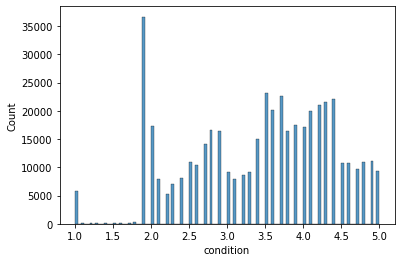

In [ ]:
sns.histplot(proc_data['condition'])

<AxesSubplot:xlabel='condition', ylabel='sellingprice'>

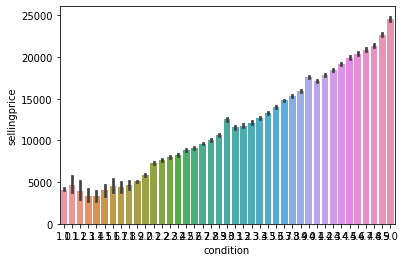

In [ ]:
sns.barplot(x='condition', y='sellingprice', data=proc_data)

In [ ]:
proc_data.describe()

,year,condition,odometer,mmr,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
proc_data.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,472336,472336,472336,472336,472336,472336,472336,472336,472336,472336,472336
unique,53,768,1507,85,2,465779,34,20,17,11927,3609
top,Ford,Altima,Base,Sedan,automatic,5uxfe43579l274932,fl,black,black,"ford motor credit company,llc",Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,81014,16346,48781,174654,455974,4,75243,93245,209870,17756,5004


In [ ]:
proc_data = proc_data.drop_duplicates('vin')
proc_data.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,465779,465779,465779,465779,465779,465779,465779,465779,465779,465779,465779
unique,53,768,1506,85,2,465779,34,20,17,11787,3600
top,Ford,Altima,Base,Sedan,automatic,5xyktca69fg566472,fl,black,black,"ford motor credit company,llc",Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,79925,16230,47989,172576,449747,1,74376,91822,206999,17731,4902


In [ ]:
proc_data['body'].value_counts().to_dict()

{'Sedan': 172576,
 'SUV': 98750,
 'sedan': 36279,
 'suv': 20329,
 'Hatchback': 19087,
 'Minivan': 18106,
 'Coupe': 12873,
 'Wagon': 11847,
 'Crew Cab': 11254,
 'Convertible': 7560,
 'SuperCrew': 6081,
 'G Sedan': 5586,
 'hatchback': 4412,
 'minivan': 3575,
 'SuperCab': 3404,
 'Regular Cab': 3351,
 'Extended Cab': 3273,
 'Van': 3036,
 'Quad Cab': 2875,
 'coupe': 2783,
 'crew cab': 2679,
 'wagon': 2171,
 'convertible': 1560,
 'supercrew': 1336,
 'g sedan': 1288,
 'G Coupe': 1192,
 'Double Cab': 1129,
 'E-Series Van': 918,
 'supercab': 696,
 'regular cab': 658,
 'extended cab': 618,
 'quad cab': 571,
 'van': 439,
 'CrewMax Cab': 372,
 'King Cab': 351,
 'double cab': 308,
 'g coupe': 301,
 'G Convertible': 233,
 'Access Cab': 205,
 'Genesis Coupe': 194,
 'e-series van': 188,
 'Koup': 131,
 'Club Cab': 128,
 'crewmax cab': 101,
 'CTS Coupe': 99,
 'king cab': 80,
 'g convertible': 70,
 'Elantra Coupe': 68,
 'genesis coupe': 56,
 'access cab': 55,
 'Mega Cab': 52,
 'Promaster Cargo Van': 46,


In [ ]:
proc_data['interior'].value_counts().to_dict()

{'black': 206999,
 'gray': 150502,
 'beige': 49740,
 'tan': 37171,
 '—': 9767,
 'brown': 6985,
 'red': 1108,
 'silver': 977,
 'blue': 907,
 'off-white': 355,
 'gold': 284,
 'purple': 282,
 'white': 211,
 'green': 199,
 'burgundy': 152,
 'orange': 121,
 'yellow': 19}

In [ ]:
proc_data['color'].value_counts().to_dict()

{'black': 91822,
 'white': 88037,
 'silver': 70179,
 'gray': 69682,
 'blue': 42513,
 'red': 36810,
 '—': 21908,
 'gold': 9404,
 'green': 9136,
 'burgundy': 7497,
 'beige': 7345,
 'brown': 5544,
 'orange': 1725,
 'purple': 1248,
 'off-white': 1218,
 'yellow': 1050,
 'charcoal': 423,
 'turquoise': 187,
 'pink': 39,
 'lime': 12}

In [ ]:
proc_data['trim'].value_counts().to_dict()

{'Base': 47989,
 'SE': 39242,
 'LX': 18556,
 'Limited': 15269,
 'LT': 15057,
 'XLT': 13641,
 'LS': 11755,
 'LE': 11388,
 'GLS': 10533,
 'S': 9926,
 'SXT': 9747,
 'Touring': 9638,
 '2.5 S': 9524,
 'SEL': 9346,
 'EX': 8249,
 'Sport': 7808,
 '2.5': 5677,
 'SLT': 5140,
 'EX-L': 4730,
 'LTZ': 4640,
 'SV': 4488,
 'G37x': 3663,
 'V6': 3544,
 'XL': 3369,
 '328i': 3130,
 'SL': 3020,
 '3.5 SV': 2907,
 'G37 Journey': 2856,
 'Lariat': 2817,
 'Titanium': 2721,
 'LT Fleet': 2590,
 '1LT': 2514,
 'LS Fleet': 2191,
 'Laredo': 2153,
 'SLE': 2008,
 'SE PZEV': 1885,
 'Premium': 1849,
 'Work Truck': 1848,
 '2LT': 1823,
 'GT': 1811,
 'Luxury': 1788,
 'R/T': 1697,
 'Denali': 1531,
 '3.5 S': 1518,
 'ES': 1477,
 'XLE': 1465,
 'LT1': 1421,
 '+': 1401,
 'i Sport': 1400,
 'FX4': 1340,
 'C250 Sport': 1299,
 'SR5': 1231,
 'XLS': 1214,
 'ST': 1145,
 'L': 1116,
 'CXL': 1100,
 'E-250': 1099,
 '1.6 SV': 1082,
 '3.2': 1066,
 '2500': 1060,
 '1500 LS': 1049,
 '1.8 S': 1046,
 '2.5i Premium PZEV': 1035,
 'i Touring': 990,
 

<AxesSubplot:ylabel='Frequency'>

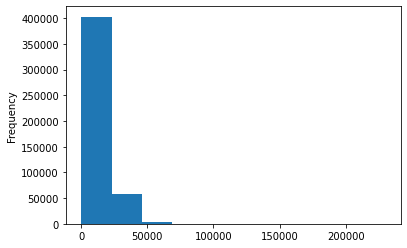

In [ ]:
proc_data['sellingprice'].plot(kind='hist')

<AxesSubplot:xlabel='sellingprice', ylabel='Count'>

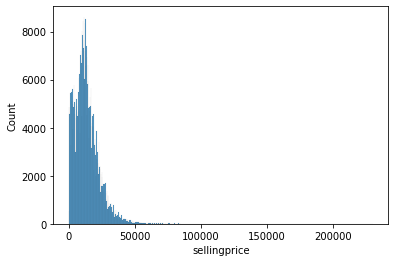

In [ ]:
sns.histplot(proc_data['sellingprice'])

<AxesSubplot:>

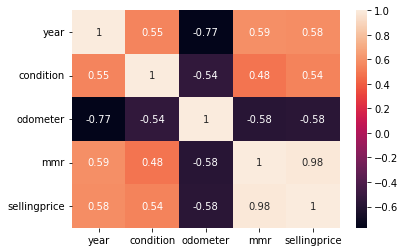

In [ ]:
sns.heatmap(proc_data.corr(), annot=True)

## Taking a Sample (1/10 of the original dataset)

In [ ]:
sample = proc_data.sample(frac=0.1, random_state=0)
sample

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
482007,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
322371,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
151985,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
392702,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
234695,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78993,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
537545,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
336146,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
123322,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Reseting the Index

In [ ]:
sample = sample.reset_index()
sample.head()

,index,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,482007,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,322371,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,151985,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,392702,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,234695,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Dropping the old Index

In [ ]:
sample = sample.drop('index', axis=1)
sample.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Checking for Null Values

In [ ]:
sample.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Converting the odometer, mmr, and sellingprice to string columns

In [ ]:
sample[['odometer','mmr','sellingprice']] = sample[['odometer','mmr','sellingprice']].astype(str)

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


## Adding the Dollar Sign to mmr and sellingprice

In [ ]:
sample['mmr'] = '$' + sample['mmr']
sample['mmr']

0        $11000
1        $28700
2        $22200
3         $3675
4        $22500
          ...  
46573    $15650
46574    $19350
46575    $22200
46576    $13400
46577     $9700
Name: mmr, Length: 46578, dtype: object

In [ ]:
sample['sellingprice'] = '$' + sample['sellingprice']
sample['sellingprice']

0        $10900
1        $29900
2        $24200
3         $3200
4        $22100
          ...  
46573    $17000
46574    $21500
46575    $22000
46576    $13800
46577     $9300
Name: sellingprice, Length: 46578, dtype: object

In [ ]:
sample[['mmr','sellingprice']]

,mmr,sellingprice
0,$11000,$10900
1,$28700,$29900
2,$22200,$24200
3,$3675,$3200
4,$22500,$22100
...,...,...
46573,$15650,$17000
46574,$19350,$21500
46575,$22200,$22000
46576,$13400,$13800


## Adding mi to the odometer

In [ ]:
sample['odometer'] = sample['odometer'] + 'mi'

In [ ]:
sample['odometer']

0         50404.0mi
1         17846.0mi
2         21122.0mi
3        145303.0mi
4          6714.0mi
            ...    
46573     52844.0mi
46574     23185.0mi
46575     45357.0mi
46576     43376.0mi
46577     49953.0mi
Name: odometer, Length: 46578, dtype: object

In [ ]:
sample.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## saving the new dataset

In [ ]:
sample.to_csv('car_prices_sample.csv', index=False)

In [ ]:
pd.read_csv('car_prices_sample.csv')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
